***DISCRETE PROBABILITY DIST FOR ML***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

import yfinance as yf

In [2]:
stock = 'RELIANCE.NS'
start = '2020-01-01'
end = '2025-01-01'

dataset = yf.download(stock, start, end)
dataset.columns = dataset.columns.get_level_values(0)
dataset.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,685.567078,693.514513,683.705164,689.381851,14004468
2020-01-02,697.238464,699.804363,686.657042,686.657042,17710316
2020-01-03,698.078613,700.122238,691.652528,696.193902,20984698
2020-01-06,681.888550,693.877760,680.299051,690.290110,24519177
2020-01-07,692.379150,696.875112,687.338178,689.835928,16683622


In [10]:
x = np.array(dataset['Close']).squeeze()
x

array([ 685.56707764,  697.23846436,  698.07861328, ..., 1221.05004883,
       1210.69995117, 1215.44995117], shape=(1238,))

In [11]:
import collections

repeat_numbers = [item for item, count in collections.Counter(x).items() if count > 1]
repeat_numbers

[np.float64(900.405029296875),
 np.float64(876.1533813476562),
 np.float64(1021.1359252929688),
 np.float64(956.3121337890625),
 np.float64(1111.99951171875),
 np.float64(1090.31494140625),
 np.float64(1237.9796142578125),
 np.float64(1204.51318359375),
 np.float64(1198.87646484375),
 np.float64(1194.760009765625),
 np.float64(1136.78466796875),
 np.float64(1161.87451171875),
 np.float64(1176.0865478515625),
 np.float64(1188.7119140625),
 np.float64(1389.409423828125),
 np.float64(1459.8701171875),
 np.float64(1464.824951171875)]

In [6]:
from scipy.stats import binom

p = 0.5
k = 100

#define the distribution
dist = binom(k, p)
for n in repeat_numbers:
    print('P of {} success: {}'.format(n, round(dist.pmf(n)*100), 6))

P of 900.405029296875 success: 0
P of 876.1533813476562 success: 0
P of 1021.1359252929688 success: 0
P of 956.3121337890625 success: 0
P of 1111.99951171875 success: 0
P of 1090.31494140625 success: 0
P of 1237.9796142578125 success: 0
P of 1204.51318359375 success: 0
P of 1198.87646484375 success: 0
P of 1194.760009765625 success: 0
P of 1136.78466796875 success: 0
P of 1161.87451171875 success: 0
P of 1176.0865478515625 success: 0
P of 1188.7119140625 success: 0
P of 1389.409423828125 success: 0
P of 1459.8701171875 success: 0
P of 1464.824951171875 success: 0


[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

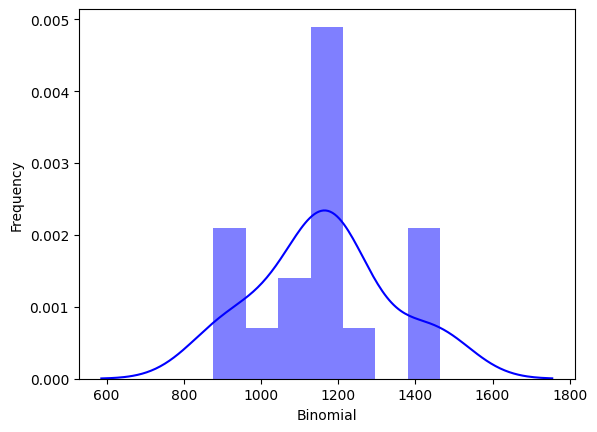

In [12]:
ax = sns.distplot(repeat_numbers,
                  kde = True,
                  color = 'blue',
                  hist_kws = {'linewidth' : 10, 'alpha': 0.50})
ax.set(xlabel = 'Binomial', ylabel = 'Frequency')

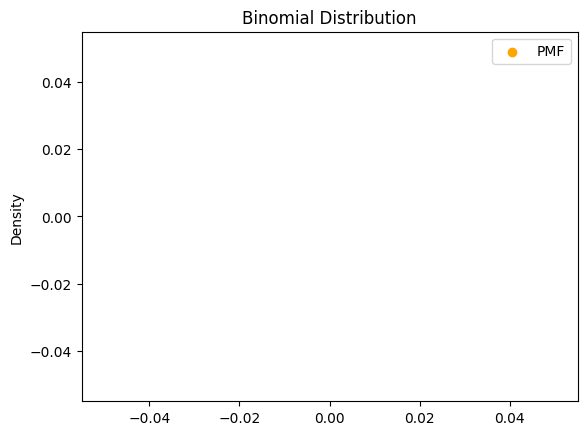

In [15]:
import scipy.stats as stats

binomial = stats.binom(n = 0.05, p = 0.002)
plt.scatter(repeat_numbers, binomial.pmf(repeat_numbers), label = 'PMF', color = 'Orange')
plt.title('Binomial Distribution')
plt.ylabel('Density')
plt.legend()

plt.show()

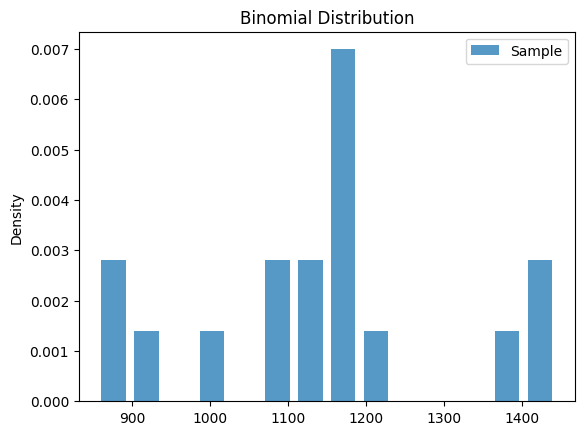

In [16]:
plt.hist(repeat_numbers,bins=14,density=True,align='left',rwidth=0.75,label="Sample",alpha=0.75)
plt.title("Binomial Distribution")
plt.ylabel("Density")
plt.legend()
#plt.xticks(repeat_numbers)
plt.show()

***CALCULATE RETURNS***

In [18]:
dataset['Returns'] = dataset['Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

Price,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2020-01-02,697.238464,699.804363,686.657042,686.657042,17710316,0.017024
2020-01-03,698.078613,700.122238,691.652528,696.193902,20984698,0.001205
2020-01-06,681.888550,693.877760,680.299051,690.290110,24519177,-0.023192
2020-01-07,692.379150,696.875112,687.338178,689.835928,16683622,0.015385
2020-01-08,687.179260,696.852371,685.748735,688.019422,16047902,-0.007510


In [20]:
r = np.array(dataset['Returns']).squeeze()
r

array([ 0.01702443,  0.00120497, -0.02319232, ...,  0.00369898,
       -0.00847639,  0.00392335], shape=(1237,))

In [21]:
repeat_r = [item for item, count in collections.Counter(r).items() if count > -2]
repeat_r

[np.float64(0.017024427075733373),
 np.float64(0.0012049664049413877),
 np.float64(-0.02319232127806159),
 np.float64(0.015384626401106605),
 np.float64(-0.007510177240006577),
 np.float64(0.02303143023489751),
 np.float64(-0.0002260799354056875),
 np.float64(-0.0025522242039084375),
 np.float64(-0.009263405994189844),
 np.float64(-0.003628932192677903),
 np.float64(0.00922002829333346),
 np.float64(0.028025238357409332),
 np.float64(-0.030771643690404082),
 np.float64(0.001011611961649228),
 np.float64(-0.0003586217604113484),
 np.float64(-0.004239092383359622),
 np.float64(-0.003471270474783128),
 np.float64(-0.0098582788502255),
 np.float64(-0.023099229430959323),
 np.float64(0.0055037557402701776),
 np.float64(-0.024394390541654154),
 np.float64(-0.022233738408514725),
 np.float64(-0.018524542951056877),
 np.float64(0.029520071487383115),
 np.float64(0.015493524005271597),
 np.float64(0.006420473365863488),
 np.float64(-0.016566011254082746),
 np.float64(0.0013601484473271253),
 np

In [22]:
def average(lst):
    return sum(lst) / len(lst)

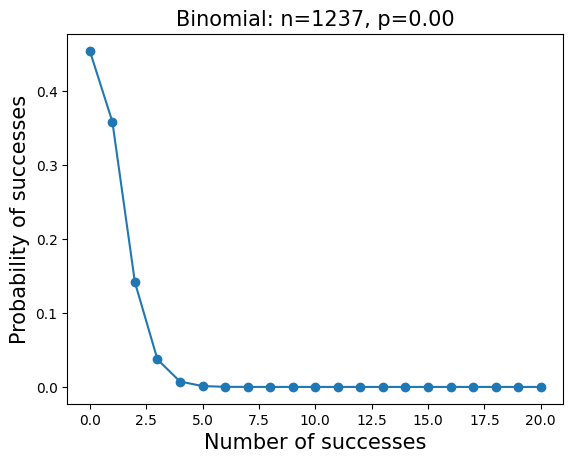

In [24]:
from scipy.stats import binom

n = len(repeat_r)
p = average(repeat_r)
k = np.arange(0, 21)
binomial = binom.pmf(k, n, p)

plt.plot(k, binomial, 'o-')
plt.title("Binomial: n=%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of successes", fontsize=15)
plt.ylabel("Probability of successes", fontsize=15)
plt.show()

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

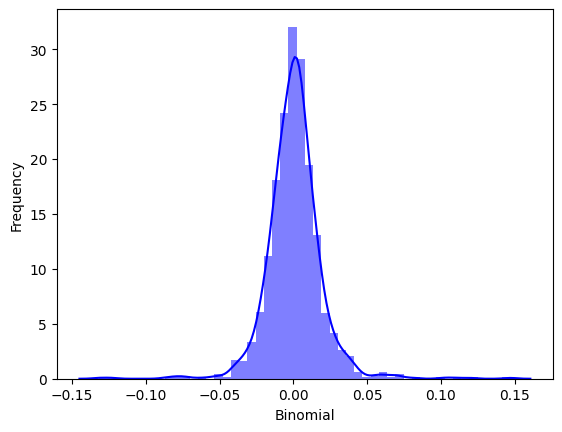

In [25]:
ax=sns.distplot(repeat_r,
                kde=True,
                color='blue',
                hist_kws={"linewidth":10,'alpha':0.50})
ax.set(xlabel='Binomial',ylabel='Frequency')

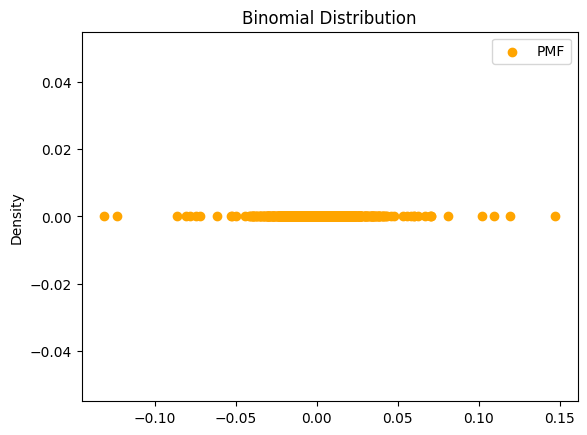

In [26]:
binomial=stats.binom(n=10,p=0.05)
plt.scatter(repeat_r,binomial.pmf(repeat_r),label="PMF",color="Orange")
plt.title("Binomial Distribution")
plt.ylabel("Density")
plt.legend()
#plt.xticks(repeat_numbers)
plt.show()